# Técnicas de Programação I
## Aula 8 - assunto extra
- Gráficos com Matplotlib

## Gráficos com Matplotlib
O matplotlib é uma biblioteca com recursos para a geração de gráficos 2D a partir de arrays. Gráficos comuns podem ser criados com alta qualidade a partir de comandos simples, inspirados nos comandos gráficos do MATLAB.  
Devido a sua alta qualidade e simplicidade de uso é a biblioteca gráfica mais popular para análise de dados. 
  
**Documentação**: https://matplotlib.org/

### Instalação
Caso já tenha instalado o pacote do **Matplotlib** ou está na dúvida, basta rodar o seguinte código:

In [1]:
import matplotlib

Se este código não rodou por erro ou se você não possui este pacote, para obtê-lo é simples, rode a célula abaixo

In [2]:
!pip install matplotlib

### Import da biblioteca
  
Para utilizarmos o matplotlib importamos o submódulo **pyplot** conforme podem observar na célula abaixo.

In [3]:
import matplotlib.pyplot as plt

O conjunto de funções disponível em **matplotlib.pyplot** permite a criação de uma figura, uma área para exibir o gráfico na figura, desenho de linhas na área do gráfico, decoração do gráfico com rótulos, etc. A sintaxe utilizada é semelhante ao MATLAB.  
   
Para simplificar o trabalho ainda mais, o pyplot já inicia com uma figura e área de desenho padrão, que você não precisa definir, e assim o código para gerar um gráfico pode ser simplesmente:

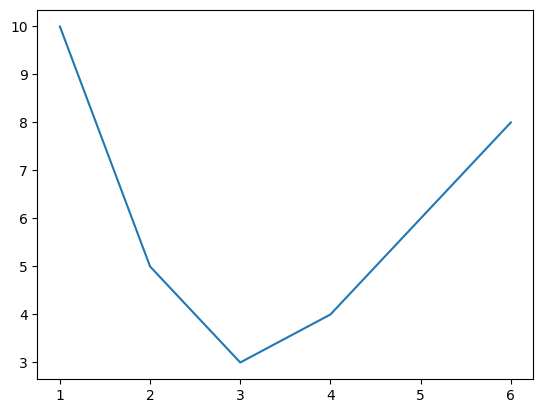

In [11]:
x = [1, 2, 3, 4, 5 ,6]
y = [10,5,3,4,6,8]
plt.plot(x, y)
plt.show()

Vamos importar também outros pacotes padrões

In [12]:
import pandas as pd
import numpy as np

## Scatter (dispersão)
**Documentação**: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

Importando o dataset dos pinguins

In [13]:
df_size = pd.read_csv('./dados/penguins_size.csv')
df_size.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Criando gráfico com Matplotlib

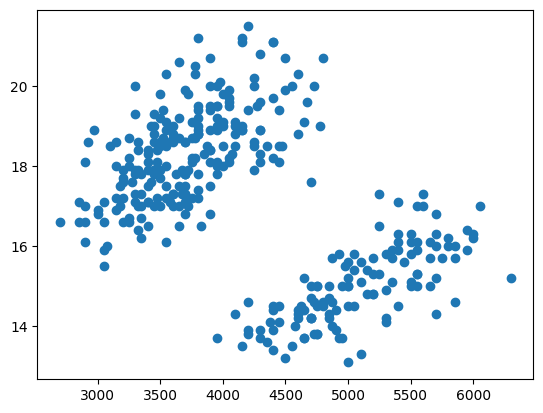

In [14]:
# A criação de gráficos com matplotlib é simples, exige que sejam preenchidos parâmetros necessários, mas
# vale ressaltar que alguns gráficos por natureza possuem dois eixos como o scatter, porém outros não
# como o histograma
plt.scatter(x=df_size['body_mass_g'], y=df_size['culmen_depth_mm']);

### Estrutura  
No matplotlib, temos dois conceitos importantes:  
  
* Área de plotagem (eixos ou Axes)
    área onde os gráficos (linhas, barras, pontos, labels, ticks, etc) aparecem. Cada Axes possui um eixo-x e eixo-y.
* Figure
    é o container de nível superior que mantém toda a estrutura. É a janela onde tudo é desenhado e controlado. Dentro dele podemos ter vários gráficos independentes.
  
  
Antes de gerarmos múltiplos gráficos, precisamos decidir:

* podemos imprimir dois gráficos, ex: duas linhas, na mesma área de plotagem
* ou em áreas de plotagens diferentes.

Para exemplificar este conceito criaremos três novos dataframes separados pelas espécies dos pinguins.

In [15]:
df_size_adelie = df_size[df_size['species'] == 'Adelie']
df_size_gentoo = df_size[df_size['species'] == 'Gentoo']
df_size_chinstrap = df_size[df_size['species'] == 'Chinstrap']

**No mesmo Eixo**

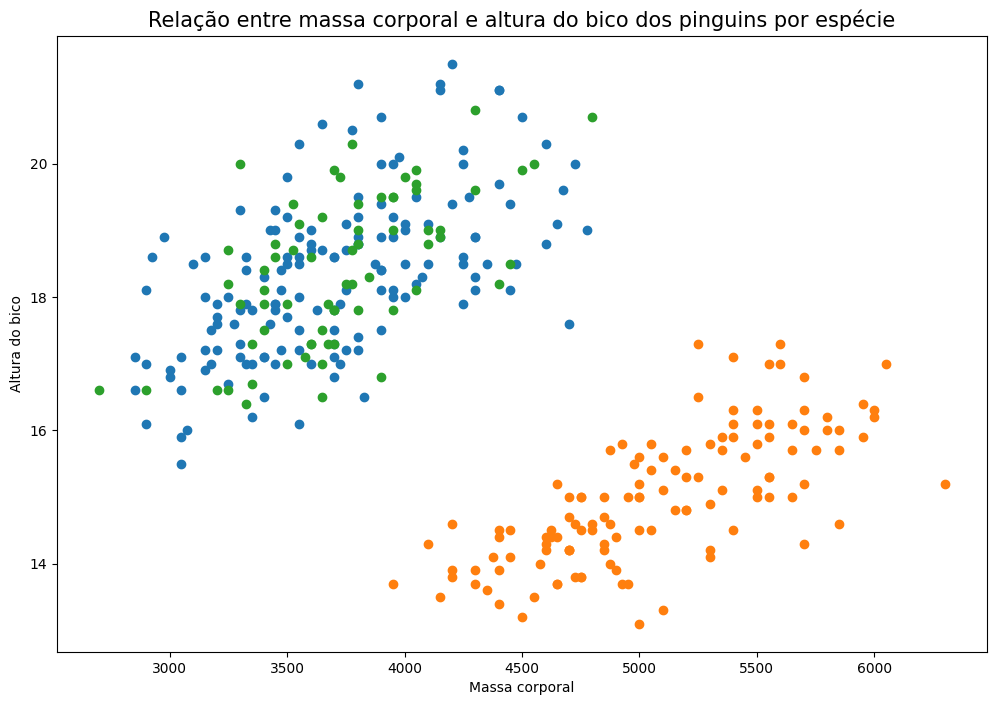

In [24]:
plt.figure(figsize=(12, 8))

plt.scatter(x=df_size_adelie['body_mass_g'], y=df_size_adelie['culmen_depth_mm']) # criando primeiro gráfico
plt.scatter(x=df_size_gentoo['body_mass_g'], y=df_size_gentoo['culmen_depth_mm']) # criando segundo gráfico
plt.scatter(x=df_size_chinstrap['body_mass_g'], y=df_size_chinstrap['culmen_depth_mm']) # criando terceiro gráfico

plt.xlabel('Massa corporal') # inserindo nome para o eixo X
plt.ylabel('Altura do bico') # inserindo nome para o eixo Y
plt.title('Relação entre massa corporal e altura do bico dos pinguins por espécie', fontsize=15); # inserindo título para o gráfico

**Em vários eixos**  
Para plotar os gráficos em vários eixos utilizaresmos o método *plt.subplots*, cuja função é gerar uma figura e um conjunto de eixos pré-posicionados num formato de grade.  
  
Para isso, ao chamarmos essa função, iremos passar dois argumentos:
* nrows: indica quantas linhas. 
* ncols: indinca quantas colunas.
  
No exemplo abaixo teremos 4 gráficos sendo, portanto, 2 linhas e 2 colunas. Desta forma, retornará uma tupla de dois elementos:  
  
* um objeto do tipo Figure que representa a figura  
* lista ou matriz de eixos  
  
Podemos acessar cada eixo usando a notação de colchetes, e invocar a função de plot normalmente.

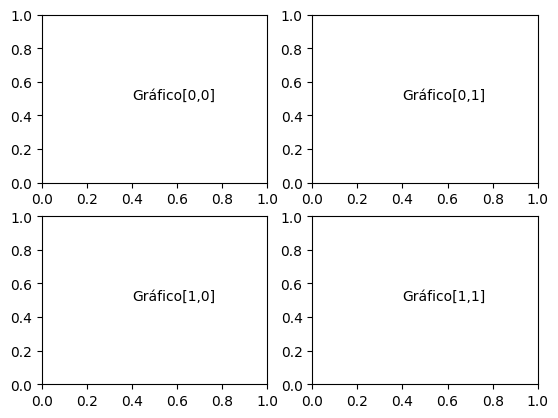

In [25]:
fig, axs = plt.subplots(2, 2)
axs[0,0].text(0.4, 0.5, 'Gráfico[0,0]')
axs[0,1].text(0.4, 0.5, 'Gráfico[0,1]')
axs[1,0].text(0.4, 0.5, 'Gráfico[1,0]')
axs[1,1].text(0.4, 0.5, 'Gráfico[1,1]');

## Tipos de gráficos
Gráficos são representações visuais dos dados, que buscam facilitar o entendimento dos mesmos. Podem ser muito úteis na identificação de variáveis importantes para uma modelagem ou tomada de decisão.

- **Scatter plot (ou gráfico de dispersão):**
Dadas duas variáveis X e Y, cada observação (par de valores (x,y)) é representado por um ponto no gráfico. Na imagem abaixo, uma observação (x,y) = (4,5) é representada pelo X vermelho.

<p align='center'>
<img src="./images/img_scatterplot_editada.png" alt="Drawing" style="width: 500px;"/>
</p>

- **Gráfico de linhas:**
O gráfico de linhas é muito utilizado quando estamos querendo encontrar tendências de um conjunto de variáveis. No geral, a variável alocada no eixo horizontal representa categorias ordinais, geralmente temporais (como por exemplo: meses, anos, dias, semanas, lotes em ordem de fabricação etc). Para construí-lo, primeiro aplica-se um gráfico de dispersão dessas variáveis, e depois unem-se os pontos por linhas, como mostra a imagem abaixo. Podemos imaginar que cada categoria é um lote de produção de uma mercadoria (em que o lote 1 foi produzido antes do lote 2, e assim por diante), e no eixo vertical, têm se a quantidade vendida de cada lote. Ainda, há 3 séries representadas por cores, que podem representar, por exemplo, três clientes diferentes que adquiriram as mercadorias.
<p align='center'>
<img src="./images/grafico_linhas.jpg" alt="Drawing" style="width: 500px;"/>
</p>

- **Gráfico de pizza/Pie plot (ou gráfico de setores):**
Este gráfico tem como objetivo representar um valor relativo de cada categoria em relação a um todo. Exemplo: de todo o lucro de uma empresa revendedora de aparelhos celular, quantos porcento são relativos a cada marca de produto comercializado.
<p align='center'>
<img src="./images/grafico_pizza.png" alt="Drawing" style="width: 400px;"/>
</p>

- **Gráfico de barras (horizontal e vertical):**
Um gráfico de barras é uma forma de visualização de dados categóricos, em que cada categoria é representada por uma barra, cujo tamanho representa sua frequência/quantidade de observações. Pode ser representado de forma vertical (conhecido também como gráfico de colunas) ou de forma horizontal (em que o gráfico parece "deitado"). No exemplo abaixo, o mesmo conjunto de dados é representado das duas formas. 

Observação: Aqui, os valores "1", "2" e "3" das barras representam categorias, e não uma variável contínua.
<p align='center'>
<img src="./images/grafico_barras.png" alt="Drawing" style="width: 500px;"/>
</p>

- **Histograma:** 
Um histograma é muito parecido com um gráfico de barras, e possui a mesma ideia: cada coluna representa uma frequência/quantidade. Entretanto, o eixo horizontal deste tipo de gráfico é uma variável contínua, e a ideia é observar a distribuição das observações desta variável. Exemplos de perguntas que podemos estar tentando responder ao analisar esse tipo de gráfico, são: "quais são os valores mais frequentes nessa variável contínua?" e "Qual a probabilidade de uma nova observação ter determinado valor?"

Para se construir as barras deste gráfico, a variável contínua é agrupada em intervalos, e o tamanho da barra representa o número de observações que possuem valores dentro deste intervalo. É comum encontrar histogramas com um traço linear ligando o topo dessas barras pelo meio, de forma a facilitar a identificação de uma distribuição estatística.
<p align='center'>
<img src="./images/histograma.png" alt="Drawing" style="width: 500px;"/>
</p>

- **Box-Plot:**
Os box-plot, assim como os histogramas, são gráficos estatísticos que permitem analisar uma distribuição dos dados, mas com uma representação diferente. Apesar de muito utilizados por estatísticos e cientistas de dados, a maioria das pessoas que não estão acostumadas a eles, têm dificuldade em interpretá-los. 

A representação do box-plot se baseia em medidas de quartis: uma caixinha central é desenhada ligando o primeiro (Q1) e terceiro (Q3) quartis (25% e 75%, respectivamente), e uma reta corta essa 'caixa' no quartil central (Q2 = 50%). Na parte inferior e superior do gráfico, é traçada uma reta de tamanho máximo 1.5xIQ, em que IQ = Q3-Q1. Essa reta é traçada até o último valor da variável que ainda esteja dentro desse limite. Observações acima ou abaixo dele, são representadas por bolinhas, e muito chamadas de 'outliers' (valor atípico). Abaixo, uma representação dos componentes de um box-plot, e um gráfico exibindo box-plots das distribuições de temperaturas de diferentes cidades.
<p align='center'>
<img src="./images/boxplot2.png" alt="Drawing" style="width: 500px;"/> 
</p>

<p align='center'>
<img src="./images/boxplot.png" alt="Drawing" style="width: 500px;"/>
</p>


**Documentação**
  
**Linhas**: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html  
**Pizza**: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html  
**Barras**: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html  
**Histograma**: https://matplotlib.org/stable/gallery/statistics/hist.html  
**Boxplot**: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html


## EDA com Matplotlib
Os bancos obtêm uma receita importante com empréstimos concedidos. Mas muitas vezes está associado ao risco. O mutuário pode não pagar o empréstimo. Para mitigar esse problema, os bancos decidiram usar o Machine Learning para superar esse problema. Eles coletaram dados anteriores sobre os tomadores de empréstimos e gostariam que você desenvolvesse um modelo de ML forte para classificar se algum novo devedor provavelmente entrará em default ou não.  
  
O conjunto de dados é enorme e consiste em vários fatores determinísticos, como renda do mutuário, gênero, finalidade do empréstimo, etc. O conjunto de dados está sujeito a uma forte multicolinearidade e valores vazios. Você pode superar esses fatores e construir um classificador forte para prever inadimplentes?

Importe a base **Loan_Default.csv** que está em csv dentro do diretório **data**.

In [26]:
import pandas as pd
df_loan = pd.read_csv('./dados/loan_default.csv')
df_loan.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [33]:
df_loan["Status"].head()

0    1
1    1
2    0
3    0
4    0
Name: Status, dtype: int64

In [36]:
df_loan["Status"].value_counts().index

Index([0, 1], dtype='int64', name='Status')

In [37]:
df_loan["Status"].value_counts().values

array([112031,  36639], dtype=int64)

In [27]:
df_loan.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

Verifique com a função .info os campos presentes na tabela

In [28]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

Imprima as estatísticas padrões do dataframe com a função .describe

In [29]:
df_loan.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


### Gráficos

In [30]:
df_loan.pivot_table(index='credit_type', values='Status', aggfunc='mean')['Status']

credit_type
CIB     0.158041
CRIF    0.162343
EQUI    0.999935
EXP     0.159854
Name: Status, dtype: float64

1) Verifique sua variável de interesse (Status) como a contagem de distribuição

Text(0, 0.5, '# de clientes')

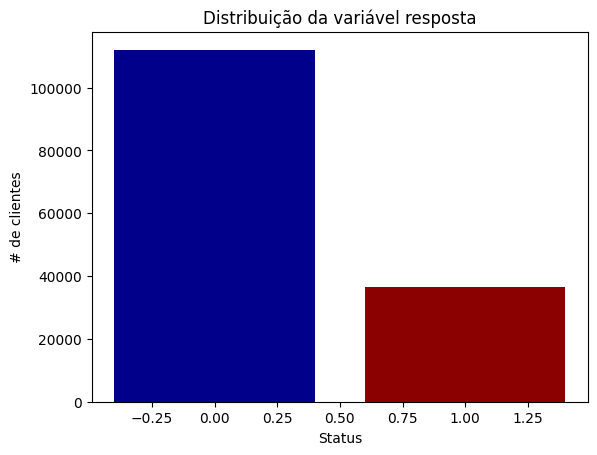

In [38]:
plt.figure()

plt.bar(df_loan['Status'].value_counts().index, 
        df_loan['Status'].value_counts().values,
        color=['darkblue', 'darkred'])

plt.title('Distribuição da variável resposta') # inserindo título
plt.xlabel('Status') # inserindo nome para o eixo X
plt.ylabel('# de clientes') # inserindo o nome para o eixo Y;

2) Construa um gráfico de barras que permita verificar a Bad Rate (média da coluna Status) por tipo de crédito oferecido (credit_type). 

Text(0, 0.5, 'Taxa de aprovação')

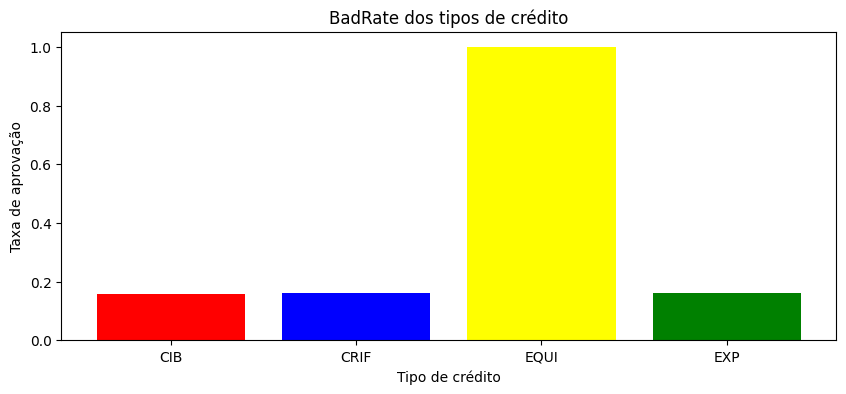

In [41]:
plt.figure(figsize=(10, 4))
plt.bar(df_loan.pivot_table(index='credit_type', values='Status', aggfunc='mean').index, 
        df_loan.pivot_table(index='credit_type', values='Status', aggfunc='mean')['Status'],
        color=['red', 'blue', 'yellow', 'green'])

plt.title('BadRate dos tipos de crédito') # inserindo título do gráfico
plt.xlabel('Tipo de crédito') # inserindo nome para o eixo X
plt.ylabel('Taxa de aprovação') # inserindo nome para o eixo Y;

3) Faça um gráfico de dispersão da Credit Score pela média do Status

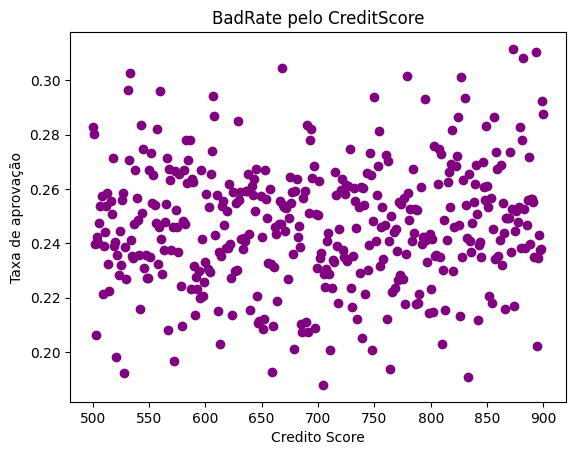

In [43]:
plt.scatter(df_loan.pivot_table(index='Credit_Score', values='Status', aggfunc='mean').index, 
            df_loan.pivot_table(index='Credit_Score', values='Status', aggfunc='mean')['Status'],
            c='purple')

plt.title('BadRate pelo CreditScore') # inserindo título do gráfico
plt.xlabel('Credito Score') # inserindo nome para o eixo X
plt.ylabel('Taxa de aprovação'); # inserindo nome para o eixo Y

3) Por meio de um gráfico de dispersão, identifique o comportamento da média da variável de interesse (Status) por faixa etária

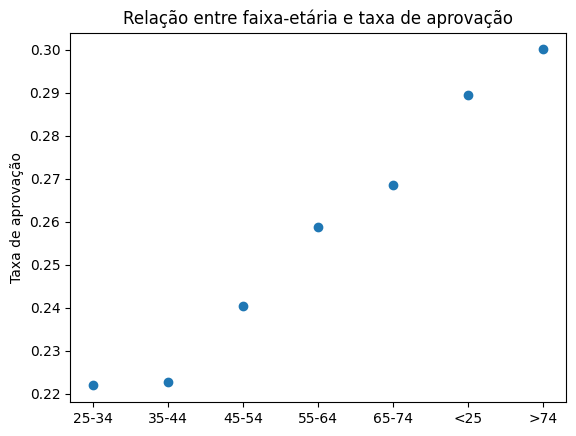

In [47]:
plt.scatter(df_loan.pivot_table(index='age', values='Status', aggfunc='mean').index, 
            df_loan.pivot_table(index='age', values='Status', aggfunc='mean')['Status'])

plt.title('Relação entre faixa-etária e taxa de aprovação') # inserindo título
plt.ylabel('Taxa de aprovação'); # inserindo nome para o eixo Y

4) Como se encontra a distribuição das faixas-etárias nesta base de dados.  
*Obs.: utilize o gráfico de pizza*

In [48]:
df_loan['age'].value_counts()

age
45-54    34720
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: count, dtype: int64

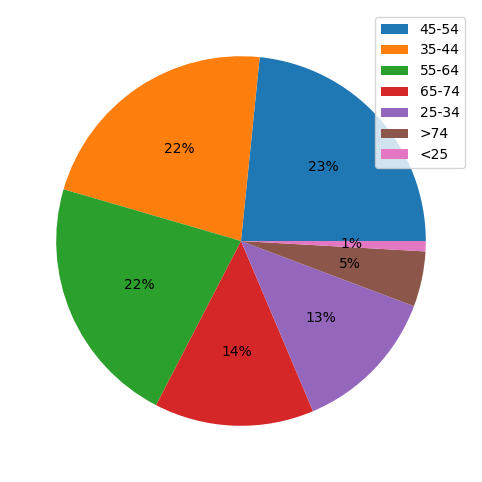

In [50]:
plt.figure(figsize=(12,6))

plt.pie(df_loan['age'].value_counts(), autopct='%1.0f%%') # criando gráfico de pizza (pie)
plt.legend(['45-54', '35-44', '55-64', '65-74', '25-34', '>74', '<25'], loc='upper right'); # inserindo legenda